In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('audio_features_w_genre.csv')
df.head()

,name,artists,id,release_date,hit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,artist_genres,season
0,(I Called Her) Tennessee (made famous by Tim D...,Off The Record,30s5eMc8gKLktD7f4qQsIN,2012-10-23,0.0,0.488,0.646,7.0,-8.331,1.0,0.0400,0.009840,0.000000,0.1010,0.4140,171.887,226206.0,4.0,NaN,regular
1,"10,000 Reasons (Bless The Lord) [Radio Version...",Matt Redman,2MobJagQB0dGJoRqI8OT0m,2012-01-01,0.0,0.459,0.561,7.0,-7.091,1.0,0.0271,0.083900,0.000000,0.0998,0.3060,144.783,256933.0,4.0,ccm,holiday
2,100 Proof,Kellie Pickler,3A3wFMufIxSUrvfGUVYvhE,2012-01-23,0.0,0.543,0.642,1.0,-5.231,1.0,0.0255,0.386000,0.000014,0.0983,0.1610,132.291,226360.0,4.0,contemporary country,holiday
3,101,Alicia Keys,7wMPExYjxfDzu4SWDUt7dQ,2012-11-26,0.0,0.277,0.289,7.0,-9.389,0.0,0.0599,0.791000,0.000632,0.0838,0.0825,170.046,387827.0,3.0,hip pop,holiday
4,1313,The Big Pink,6OHDgi8V4Q6hFYvQavBVaF,2012-01-16,0.0,0.574,0.900,10.0,-7.976,0.0,0.0630,0.000318,0.055800,0.1600,0.4030,105.991,352653.0,4.0,dance rock,holiday


In [3]:
df.isna().sum()

name                  0
artists               0
id                    0
release_date          0
hit                   0
danceability          1
energy                1
key                   1
loudness              1
mode                  1
speechiness           1
acousticness          1
instrumentalness      1
liveness              1
valence               1
tempo                 1
duration_ms           1
time_signature        1
artist_genres       727
season                0
dtype: int64

In [4]:
df.dropna(subset=['danceability'], inplace=True)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
hit,20575.0,0.158979,0.365666,0.000000,0.00000,0.000000,0.0000,1.000
danceability,20575.0,0.566810,0.153017,0.000000,0.46700,0.568000,0.6720,0.981
energy,20575.0,0.673839,0.210159,0.002970,0.53700,0.706000,0.8430,0.999
key,20575.0,5.172442,3.601128,0.000000,2.00000,5.000000,8.0000,11.000
loudness,20575.0,-6.630647,2.957870,-36.049000,-7.87950,-6.024000,-4.6730,0.232
mode,20575.0,0.671203,0.469787,0.000000,0.00000,1.000000,1.0000,1.000
speechiness,20575.0,0.085636,0.093306,0.000000,0.03460,0.047500,0.0890,0.953
acousticness,20575.0,0.210473,0.270694,0.000001,0.00998,0.077400,0.3235,0.994
instrumentalness,20575.0,0.046163,0.156606,0.000000,0.00000,0.000009,0.0014,0.995
liveness,20575.0,0.186966,0.142373,0.018800,0.09850,0.127000,0.2400,0.986


In [5]:
df.value_counts('hit')

hit
0.0    17304
1.0     3271
dtype: int64

<AxesSubplot:>

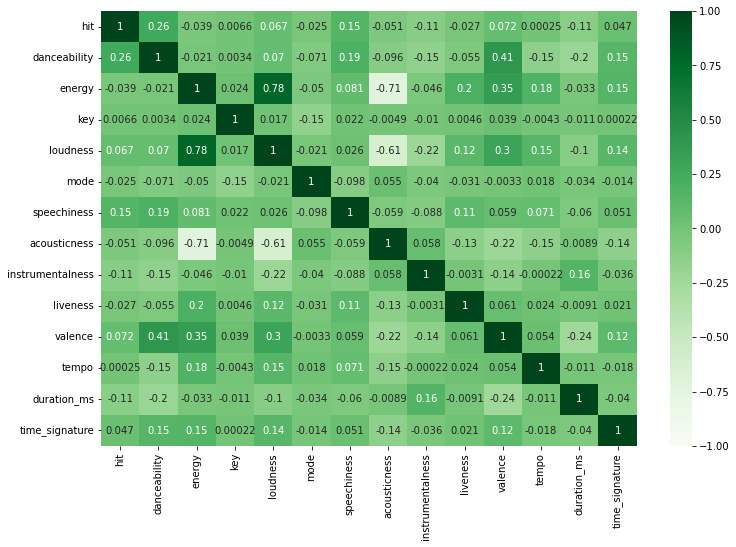

In [6]:
# Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap='Greens')

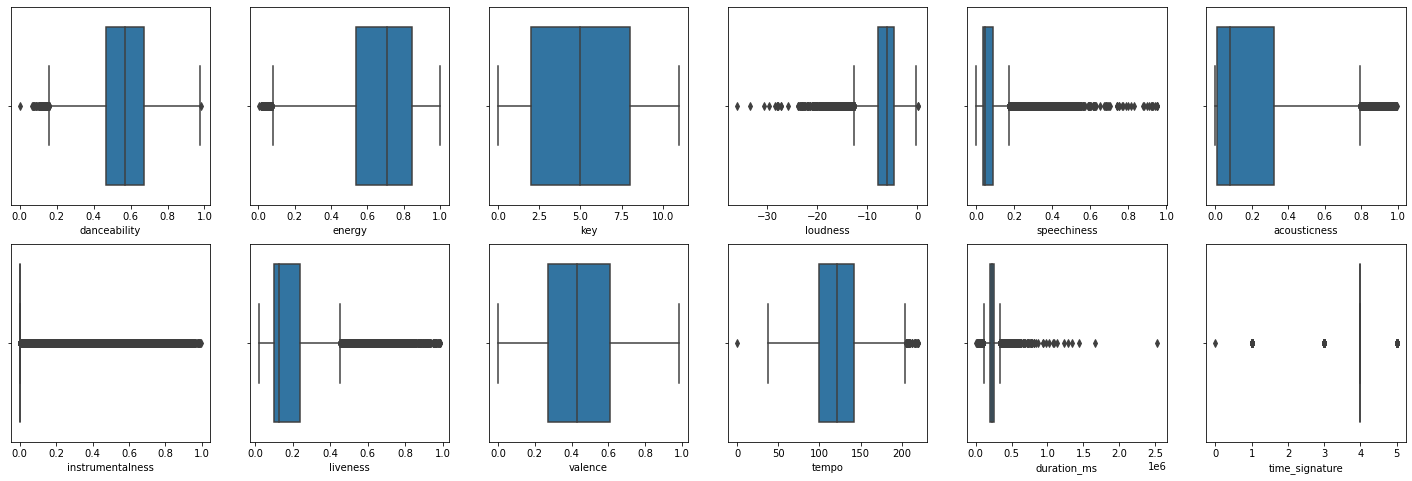

In [7]:
# Plot boxplot to identify outliers
col = list(df.columns[5:9])+list(df.columns[10:18])
fig, ax = plt.subplots(2,6, figsize=(25,8))
for i in range(len(col)):
    sns.boxplot(x=df[col[i]], 
                ax=ax[i//6, i%6])

In [8]:
# Danceability outliers
df[df['danceability'] <= 0.18]

,name,artists,id,release_date,hit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,artist_genres,season
120,Angel,Sarah Brightman,4ONd4j4MRfz48gpi2hjYuQ,2012-10-16,0.0,0.1290,0.4630,1.0,-8.683,1.0,0.0324,0.139000,0.010600,0.1440,0.0619,90.015,256841.0,4.0,operatic pop,regular
150,Arena Rock Encore With Full Cast,The Cribs,0QPMMzMUwagPV5BxCFmyKD,2012-04-30,0.0,0.1380,0.8640,10.0,-2.360,1.0,0.0446,0.000009,0.000013,0.2090,0.5150,92.507,159600.0,4.0,british indie rock,regular
174,Back to the Bolthole,The Cribs,2XCsZDApjiSvwDaH4rBsfe,2012-04-30,0.0,0.0889,0.8560,11.0,-3.547,1.0,0.0790,0.001480,0.000642,0.0782,0.1460,164.473,288933.0,4.0,british indie rock,regular
182,Bad Mood,The Vaccines,2iK3OY41tNfkz8fOOb7qZm,2012-09-03,0.0,0.1730,0.9150,11.0,-3.587,0.0,0.0751,0.001120,0.625000,0.3300,0.4590,187.896,184787.0,4.0,indie rock,regular
241,Belles,Andrew Bird,4DPgohAtt0EUbSl8kqhcpX,2012-03-06,0.0,0.1120,0.0897,0.0,-22.757,1.0,0.0378,0.967000,0.959000,0.0903,0.0378,71.690,173320.0,5.0,art pop,regular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18093,Crowlink,Shirley Collins,290nlFboAnZmjc6SujZBjJ,2020-07-24,0.0,0.0834,0.4540,6.0,-13.866,1.0,0.0522,0.976000,0.914000,0.2140,0.0364,78.541,269386.0,4.0,british folk,summer
18224,Four Notes - Paul's Tune - Arr. by Daniel Whibley,"Paul Harvey, Daniel Whibley, BBC Philharmonic",30uXCFquS0xzhRYCn1b4w8,2020-10-22,0.0,0.1090,0.1750,5.0,-13.971,1.0,0.0359,0.911000,0.857000,0.1120,0.0397,72.898,157962.0,4.0,NaN,regular
18643,Ohms,Deftones,0h6vLT1rLneoc5I4sOxvB1,2020-09-25,0.0,0.1120,0.9780,4.0,-2.640,1.0,0.1170,0.000108,0.024100,0.1170,0.3710,173.097,250222.0,3.0,alternative metal,regular
18986,Unfollow The Rules,Rufus Wainwright,2JHTc03AR4cZqDsoNfWIF0,2020-07-10,0.0,0.1650,0.3290,0.0,-7.602,1.0,0.0329,0.807000,0.000901,0.0867,0.1550,178.984,404773.0,3.0,canadian pop,summer


In [9]:
# Energy outliers
df[df['energy'] < 0.08]

,name,artists,id,release_date,hit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,artist_genres,season
41,A Prayer,Gordon Bahary,5bvG3JuW5b508b29PJFsTw,2012-08-28,0.0,0.319,0.0799,5.0,-16.309,0.0,0.0363,0.952,0.001680,0.1260,0.0661,115.211,263627.0,4.0,NaN,summer
49,A Wasteland Companion,M. Ward,1SvYJ5T036qyNqF8MUiGXX,2012-04-10,0.0,0.458,0.0523,0.0,-15.707,1.0,0.0361,0.723,0.727000,0.1420,0.0979,86.632,174800.0,4.0,alternative country,regular
809,Given To The Wild (Intro),The Maccabees,1luvHbIPiLmziP4dJp6UM9,2011-01-01,0.0,0.111,0.0326,9.0,-27.248,1.0,0.0452,0.954,0.851000,0.1020,0.0351,156.872,131413.0,4.0,alternative dance,holiday
874,Half the World,Paul Buchanan,10KyfpIQMZK7TyuvfiKsRc,2012-05-21,0.0,0.365,0.0267,0.0,-19.764,1.0,0.0433,0.972,0.030900,0.1170,0.1220,112.459,176562.0,5.0,melancholia,regular
1377,Lynn's Theme,Ólafur Arnalds,4raK8KGN7ML18hgQ06iwhm,2012-02-27,0.0,0.212,0.0754,2.0,-23.612,0.0,0.0496,0.987,0.515000,0.1020,0.0730,61.292,116227.0,4.0,bow pop,regular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18897,The End Of The Affair,Laura Marling,58rAKJXkScai2unHFpFXIN,2020-04-10,0.0,0.383,0.0550,9.0,-16.907,1.0,0.0372,0.929,0.000101,0.0853,0.2300,84.863,204987.0,4.0,art pop,regular
18974,Tryin' To Keep It Together,Norah Jones,1E4wqt5DjnD1hP7gGR5KeJ,2020-04-29,0.0,0.333,0.0755,2.0,-14.768,0.0,0.0384,0.993,0.374000,0.0788,0.0956,176.589,239920.0,3.0,contemporary vocal jazz,regular
19365,Humming - Interlude 1,St. Vincent,2yJI0qWDbuJE4dRGh2L156,2021-05-14,0.0,0.422,0.0266,0.0,-29.683,1.0,0.0418,0.927,0.848000,0.0962,0.1400,79.688,57827.0,4.0,art pop,regular
19400,Just For Today,Clairo,63O4CpEtppRmeOZ89Fb8tn,2021-07-16,0.0,0.379,0.0405,3.0,-21.848,1.0,0.0329,0.920,0.000572,0.1050,0.3190,144.335,217065.0,4.0,bedroom pop,summer


In [10]:
# Loudness outliers
df[df['loudness'] < -12]

,name,artists,id,release_date,hit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,artist_genres,season
23,4th Street Feeling,Melissa Etheridge,1d1GKqeB0Q3B0DjXDoP0PZ,2012-01-01,0.0,0.720,0.3310,5.0,-12.919,1.0,0.0803,0.4930,0.000023,0.1080,0.4030,104.020,213240.0,4.0,heartland rock,holiday
40,A Place Above,"Jehnny Beth, Cillian Murphy",2zW1XlHAazTViSVM60yh6z,2020-06-12,0.0,0.503,0.2890,4.0,-17.151,0.0,0.1920,0.6340,0.044900,0.1170,0.3520,164.889,73265.0,1.0,NaN,summer
41,A Prayer,Gordon Bahary,5bvG3JuW5b508b29PJFsTw,2012-08-28,0.0,0.319,0.0799,5.0,-16.309,0.0,0.0363,0.9520,0.001680,0.1260,0.0661,115.211,263627.0,4.0,NaN,summer
49,A Wasteland Companion,M. Ward,1SvYJ5T036qyNqF8MUiGXX,2012-04-10,0.0,0.458,0.0523,0.0,-15.707,1.0,0.0361,0.7230,0.727000,0.1420,0.0979,86.632,174800.0,4.0,alternative country,regular
66,"Ah, Sweet Dancer",Santana,60cvFw0AoVDae3wzW0DDZG,2012-05-11,0.0,0.331,0.2180,4.0,-12.877,0.0,0.0370,0.9770,0.852000,0.0859,0.2370,75.055,188360.0,4.0,blues rock,regular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20376,Surf,Mac Miller,1kwnxJNVl7cwcU98RvMBaR,2020-01-17,1.0,0.828,0.1820,1.0,-13.066,0.0,0.1660,0.7540,0.070600,0.1500,0.2310,147.279,330507.0,4.0,hip hop,holiday
20456,B*tch From Da Souf,Latto,6tLWt7gkvvTSjS6OfJjiyJ,2019-01-14,1.0,0.862,0.2350,1.0,-15.545,1.0,0.6990,0.0241,0.000000,0.1230,0.3980,150.062,144048.0,4.0,pop,holiday
20481,Mele Kalikimaka (Merry Christmas),"Bing Crosby, The Andrews Sisters",04vLj9QUXoKdRlsp3gkURo,1945-01-01,1.0,0.500,0.2240,3.0,-12.431,1.0,0.0935,0.6460,0.000000,0.2840,0.6200,202.481,175333.0,4.0,adult standards,holiday
20488,I'll Be Home For Christmas - Single Version,Bing Crosby,1fjOitI0vZ41P63p1MQLcc,1997-11-04,1.0,0.240,0.0967,7.0,-15.167,1.0,0.0336,0.7070,0.000084,0.3670,0.1780,84.759,177027.0,4.0,adult standards,holiday


In [11]:
# Tempo outliers
df[(df['tempo'] > 200) | (df['tempo'] < 25)]

,name,artists,id,release_date,hit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,artist_genres,season
154,Around My Way (Freedom Ain't Free),Lupe Fiasco,2Vba5MBCdGqcE57GSiOstv,2012-09-25,0.0,0.482,0.877,8.0,-3.714,0.0,0.3740,0.0526,0.000000,0.3660,0.635,205.037,255773.0,4.0,chicago rap,regular
503,Cupid's Got a Shotgun,Carrie Underwood,24w0eusbTsyhPkJj72LUIm,2012-05-01,0.0,0.306,0.950,5.0,-2.057,0.0,0.1490,0.1570,0.000001,0.2390,0.750,216.029,223427.0,4.0,contemporary country,regular
597,Don't Rush (feat. Vince Gill),"Kelly Clarkson, Vince Gill",5HuyeNQq0GTDMhr7QtE5yj,2012-11-19,0.0,0.406,0.665,1.0,-6.020,1.0,0.0298,0.0264,0.000000,0.0826,0.522,201.700,242013.0,4.0,dance pop,holiday
984,How Ya Doin'? (feat. Missy Elliott),"Little Mix, Missy Elliott",457VLDn6a4MuwJhvqceLjj,2012-11-19,0.0,0.420,0.944,10.0,-3.476,0.0,0.4300,0.0951,0.000000,0.1600,0.511,201.946,213173.0,4.0,dance pop,holiday
996,I Ain't Your Mama,Maggie Rose,6byumJOboPk8G9GxY8K7wj,2013-03-13,0.0,0.580,0.712,7.0,-3.530,1.0,0.0709,0.6010,0.000000,0.0912,0.737,201.984,178840.0,4.0,contemporary country,regular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20168,It's the Most Wonderful Time of the Year,Andy Williams,5hslUAKq9I9CG2bAulFkHN,1963-11-24,1.0,0.240,0.598,7.0,-8.435,1.0,0.0369,0.7660,0.000000,0.1170,0.776,201.629,151933.0,3.0,adult standards,holiday
20215,Alone (Feat. Big Sean & Stefflon Don),"Halsey, Big Sean, Stefflon Don",3tbNT2X5tfMIVeUflYbZUZ,2018-03-15,1.0,0.445,0.662,2.0,-4.802,0.0,0.1810,0.0164,0.000000,0.2190,0.479,200.040,207458.0,4.0,dance pop,regular
20229,Cops Shot The Kid,"Nas, Kanye West",1vi9adPJiD4d22ybGp25hy,2018-06-15,1.0,0.442,0.710,7.0,-5.142,1.0,0.6840,0.0264,0.000000,0.6180,0.508,205.116,167908.0,4.0,conscious hip hop,summer
20481,Mele Kalikimaka (Merry Christmas),"Bing Crosby, The Andrews Sisters",04vLj9QUXoKdRlsp3gkURo,1945-01-01,1.0,0.500,0.224,3.0,-12.431,1.0,0.0935,0.6460,0.000000,0.2840,0.620,202.481,175333.0,4.0,adult standards,holiday


In [12]:
# Drop outliers
df_clean = df.loc[~(
    (df['danceability'] <= 0.18) |
    (df['energy'] < 0.08) |
    (df['loudness'] < -12) |
    (df['tempo'] > 200) | (df['tempo'] < 25)), :]
df_clean

,name,artists,id,release_date,hit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,artist_genres,season
0,(I Called Her) Tennessee (made famous by Tim D...,Off The Record,30s5eMc8gKLktD7f4qQsIN,2012-10-23,0.0,0.488,0.646,7.0,-8.331,1.0,0.0400,0.009840,0.000000,0.1010,0.4140,171.887,226206.0,4.0,NaN,regular
1,"10,000 Reasons (Bless The Lord) [Radio Version...",Matt Redman,2MobJagQB0dGJoRqI8OT0m,2012-01-01,0.0,0.459,0.561,7.0,-7.091,1.0,0.0271,0.083900,0.000000,0.0998,0.3060,144.783,256933.0,4.0,ccm,holiday
2,100 Proof,Kellie Pickler,3A3wFMufIxSUrvfGUVYvhE,2012-01-23,0.0,0.543,0.642,1.0,-5.231,1.0,0.0255,0.386000,0.000014,0.0983,0.1610,132.291,226360.0,4.0,contemporary country,holiday
3,101,Alicia Keys,7wMPExYjxfDzu4SWDUt7dQ,2012-11-26,0.0,0.277,0.289,7.0,-9.389,0.0,0.0599,0.791000,0.000632,0.0838,0.0825,170.046,387827.0,3.0,hip pop,holiday
4,1313,The Big Pink,6OHDgi8V4Q6hFYvQavBVaF,2012-01-16,0.0,0.574,0.900,10.0,-7.976,0.0,0.0630,0.000318,0.055800,0.1600,0.4030,105.991,352653.0,4.0,dance rock,holiday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20571,TALES OF DOMINICA,Lil Nas X,5S4PZ7AuYlYiVIVik3wHUf,2021-09-17,1.0,0.742,0.734,8.0,-5.582,0.0,0.0407,0.629000,0.003140,0.0834,0.5410,114.952,146006.0,4.0,lgbtq+ hip hop,regular
20572,ONE OF ME (feat. Elton John),"Lil Nas X, Elton John",3JR2RztQcOjUQGQSybxDIO,2021-09-17,1.0,0.708,0.598,3.0,-4.969,0.0,0.0617,0.202000,0.000000,0.1830,0.5610,144.090,161667.0,4.0,lgbtq+ hip hop,regular
20573,LOST IN THE CITADEL,Lil Nas X,6th8IdY4lYeM0QlSQJhhkp,2021-09-17,1.0,0.768,0.764,0.0,-5.820,1.0,0.0295,0.096300,0.000010,0.1140,0.4720,92.965,170323.0,4.0,lgbtq+ hip hop,regular
20574,In Da Getto,"J Balvin, Skrillex",63aj87TQG6F3RVO5nbG2VQ,2021-07-02,1.0,0.915,0.720,8.0,-3.126,1.0,0.0459,0.025000,0.000014,0.0942,0.6310,126.986,131067.0,4.0,latin,summer


In [13]:
df_clean.value_counts('hit')

hit
0.0    16029
1.0     3197
dtype: int64

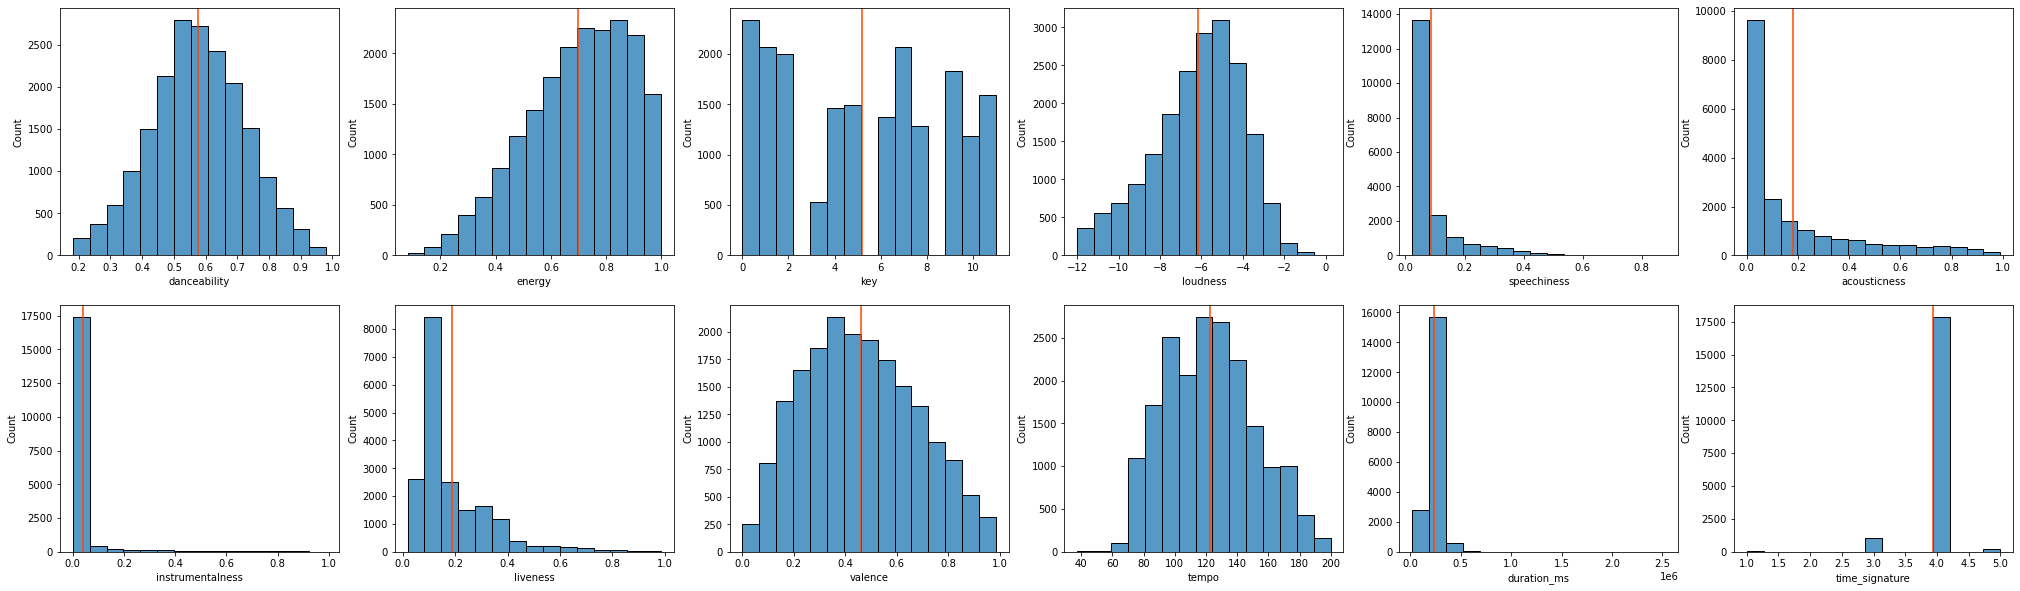

In [14]:
# Histograms of audio features for distribution comparison
fig, ax = plt.subplots(2,6, figsize=(35,10))
for i in range(len(col)):
    sns.histplot(x=col[i], 
                 data=df_clean,
                 ax=ax[i//6, i%6],
                 bins=15)
    ax[i//6, i%6].axvline(x=np.mean(df_clean[col[i]]), color='orangered')

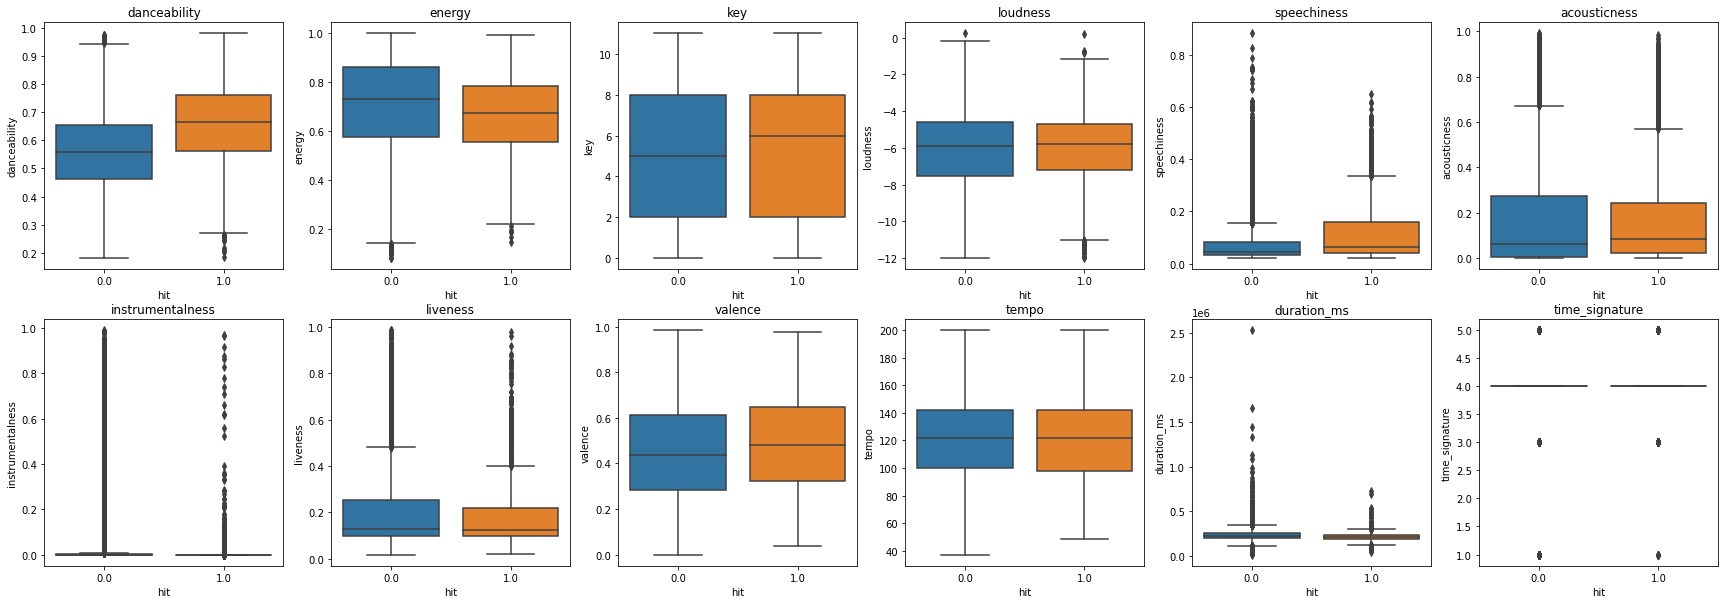

In [15]:
# Side-by-side boxplot of audio features of hit and non-hit songs
fig, ax = plt.subplots(2,6, figsize=(30,10))
for i in range(len(col)):
    sns.boxplot(x='hit',
                y=col[i], 
                data=df_clean,
                ax=ax[i//6, i%6]).set_title('{}'.format(col[i]))

In [16]:
df_clean.to_csv('audio_features_w_genre_clean.csv', index=False)